<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #7ab052;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
    ">
        🍃 🍅 Tomato Leaf Disease | 92% Accuracy
    </h1>
</div>

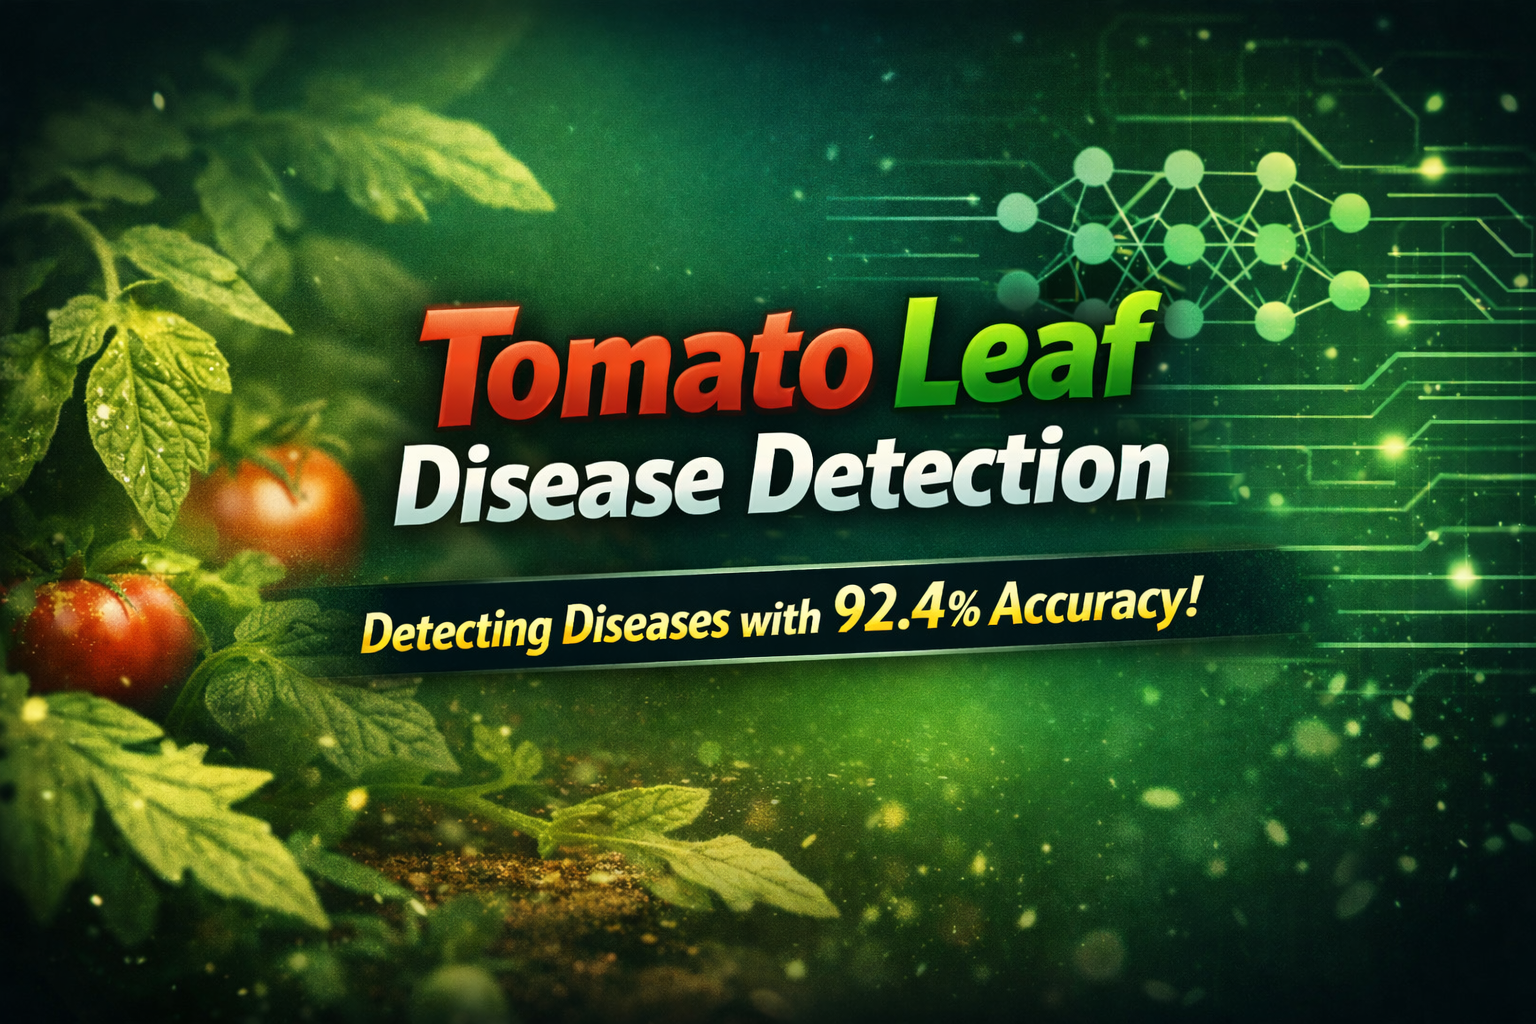

In [9]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/tomato-disease/tomato.png'))

<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #7ab052;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
    ">
       🌿 1 | Advanced Imports & Environment Setup
    </h1>
</div>

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetV2S

import warnings
warnings.filterwarnings('ignore')

<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
<p style="
    color: #d8f3dc;
    font-size: 16px;
    margin: 10px auto 0 auto;
    text-align: center;
">
    <strong>Implementation:</strong> We import EfficientNetV2S (the state-of-the-art in efficiency) and layers for building our custom head. We also include numpy for better data handling.
</p>
</div>


<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #7ab052;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
    ">
       🌿 2 | Advanced Data Pipeline (with Augmentation)
    </h1>
    <p style="
        color: #d8f3dc;
        font-size: 16px;
        margin: 0 auto;
        text-align: center;
    ">
        Instead of just dividing by 255, we apply Data Augmentation directly into the pipeline to prevent overfitting.
    </p>
</div>


In [3]:
IMG_SIZE = 224 # EfficientNetV2-S standard size
BATCH_SIZE = 32

# Training Data with Augmentation
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/train',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/val',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Augmentation Layer (Advanced Methodology)
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.1),
  layers.RandomContrast(0.1),
])

# Optimize performance with Prefetching
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 10000 files belonging to 10 classes.


I0000 00:00:1769617601.435823      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1769617601.439751      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 1000 files belonging to 10 classes.


<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
<p style="
    color: #d8f3dc;
    font-size: 16px;
    margin: 10px auto 0 auto;
    text-align: center;
">
    <strong>Implementation:</strong> We use tf.data for high-performance loading and include a data_augmentation layer that runs on the GPU. prefetch ensures the GPU never waits for data from the CPU.
</p>
</div>

<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #7ab052;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
    ">
       🌿 3 | Visualizing the Augmented Samples
    </h1>
</div>


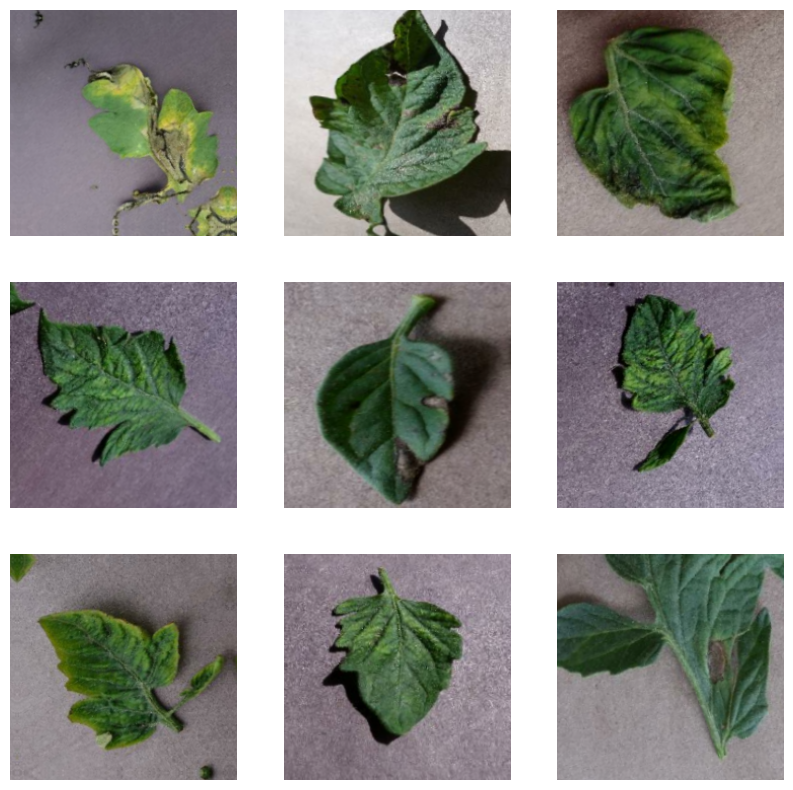

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
<p style="
    color: #d8f3dc;
    font-size: 16px;
    margin: 10px auto 0 auto;
    text-align: center;
">
    <strong>Implementation:</strong> This cell visualizes how the model "sees" the leaves after augmentation (flipped, rotated, etc.), which is critical for understanding model robustness.
</p>
</div>


<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #7ab052;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
    ">
       🌿 4 | Building the SOTA Model (EfficientNetV2)
    </h1>
</div>

In [5]:
base_model = EfficientNetV2S(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    pooling='avg'
)
base_model.trainable = False # Start by freezing

model = models.Sequential([
    base_model,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4), # Increased dropout to handle complexity
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
<p style="
    color: #d8f3dc;
    font-size: 16px;
    margin: 10px auto 0 auto;
    text-align: center;
">
    <strong>Implementation:</strong> We use EfficientNetV2-S as our backbone. It uses MBConv and Fused-MBConv layers, which are superior at capturing fine-grained leaf textures compared to DenseNet. 
</p>
</div>

<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #7ab052;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
    ">
       🌿 5 | Smart Training with Callbacks
    </h1>
        <p style="
        color: #d8f3dc;
        font-size: 16px;
        margin: 0 auto;
        text-align: center;
    ">
       To get good accuracy, we don't just stop early; we reduce the learning rate when progress plateaus.
    </p>
</div>

In [6]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2),
    tf.keras.callbacks.ModelCheckpoint('best_tomato_model.h5', save_best_only=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50, # We usually need fewer epochs with EfficientNetV2
    callbacks=callbacks
)

Epoch 1/50


I0000 00:00:1769617679.834201     183 service.cc:152] XLA service 0x7a8490017da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769617679.834238     183 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1769617679.834242     183 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1769617684.583524     183 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-28 16:28:14.842440: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:28:14.982109: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:28:15.788875: E external/local_xl

  1/313 ━━━━━━━━━━━━━━━━━━━━ 4:34:11 53s/step - accuracy: 0.1562 - loss: 3.0025

I0000 00:00:1769617711.492464     183 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.5999 - loss: 1.2580

2026-01-28 16:29:45.499881: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:29:45.635478: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:29:46.382701: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:29:46.520029: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:29:47.795033: E external/local_xla/xla/stream_

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.6003 - loss: 1.2568

2026-01-28 16:30:18.057040: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:30:18.191682: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:30:18.917630: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:30:19.054349: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 16:30:20.299508: E external/local_xla/xla/stream_

313/313 ━━━━━━━━━━━━━━━━━━━━ 166s 362ms/step - accuracy: 0.6006 - loss: 1.2556 - val_accuracy: 0.8530 - val_loss: 0.4632 - learning_rate: 0.0010
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.8137 - loss: 0.5585

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.8137 - loss: 0.5584 - val_accuracy: 0.8840 - val_loss: 0.3467 - learning_rate: 0.0010
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8424 - loss: 0.4635

313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 185ms/step - accuracy: 0.8425 - loss: 0.4635 - val_accuracy: 0.8940 - val_loss: 0.2683 - learning_rate: 0.0010
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.8570 - loss: 0.4220

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.8570 - loss: 0.4219 - val_accuracy: 0.9120 - val_loss: 0.2487 - learning_rate: 0.0010
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8650 - loss: 0.4030

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 183ms/step - accuracy: 0.8650 - loss: 0.4030 - val_accuracy: 0.9110 - val_loss: 0.2412 - learning_rate: 0.0010
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - accuracy: 0.8767 - loss: 0.3787 - val_accuracy: 0.9160 - val_loss: 0.2502 - learning_rate: 0.0010
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.8851 - loss: 0.3379

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.8851 - loss: 0.3378 - val_accuracy: 0.9130 - val_loss: 0.2180 - learning_rate: 0.0010
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 182ms/step - accuracy: 0.8875 - loss: 0.3306 - val_accuracy: 0.9240 - val_loss: 0.2210 - learning_rate: 0.0010
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8956 - loss: 0.3265

313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 185ms/step - accuracy: 0.8956 - loss: 0.3264 - val_accuracy: 0.9320 - val_loss: 0.2093 - learning_rate: 0.0010
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 183ms/step - accuracy: 0.8974 - loss: 0.3092 - val_accuracy: 0.9190 - val_loss: 0.2154 - learning_rate: 0.0010
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 182ms/step - accuracy: 0.8990 - loss: 0.2912 - val_accuracy: 0.9200 - val_loss: 0.2096 - learning_rate: 0.0010
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9066 - loss: 0.2824

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.9066 - loss: 0.2823 - val_accuracy: 0.9320 - val_loss: 0.1714 - learning_rate: 2.0000e-04
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9228 - loss: 0.2315

313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 186ms/step - accuracy: 0.9228 - loss: 0.2315 - val_accuracy: 0.9390 - val_loss: 0.1577 - learning_rate: 2.0000e-04
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9259 - loss: 0.2192

313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 186ms/step - accuracy: 0.9259 - loss: 0.2192 - val_accuracy: 0.9430 - val_loss: 0.1542 - learning_rate: 2.0000e-04
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9241 - loss: 0.2112

313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 186ms/step - accuracy: 0.9241 - loss: 0.2112 - val_accuracy: 0.9450 - val_loss: 0.1500 - learning_rate: 2.0000e-04
Epoch 16/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9302 - loss: 0.2038

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.9302 - loss: 0.2038 - val_accuracy: 0.9410 - val_loss: 0.1470 - learning_rate: 2.0000e-04
Epoch 17/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 179ms/step - accuracy: 0.9320 - loss: 0.2107 - val_accuracy: 0.9460 - val_loss: 0.1483 - learning_rate: 2.0000e-04
Epoch 18/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9316 - loss: 0.1932

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.9317 - loss: 0.1932 - val_accuracy: 0.9460 - val_loss: 0.1451 - learning_rate: 2.0000e-04
Epoch 19/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9340 - loss: 0.1995

313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 186ms/step - accuracy: 0.9340 - loss: 0.1995 - val_accuracy: 0.9470 - val_loss: 0.1365 - learning_rate: 2.0000e-04
Epoch 20/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 182ms/step - accuracy: 0.9352 - loss: 0.1911 - val_accuracy: 0.9440 - val_loss: 0.1401 - learning_rate: 2.0000e-04
Epoch 21/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9326 - loss: 0.1984

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.9326 - loss: 0.1984 - val_accuracy: 0.9510 - val_loss: 0.1330 - learning_rate: 2.0000e-04
Epoch 22/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - accuracy: 0.9368 - loss: 0.1837 - val_accuracy: 0.9510 - val_loss: 0.1357 - learning_rate: 2.0000e-04
Epoch 23/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9363 - loss: 0.1882

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.9363 - loss: 0.1882 - val_accuracy: 0.9500 - val_loss: 0.1265 - learning_rate: 2.0000e-04
Epoch 24/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 180ms/step - accuracy: 0.9366 - loss: 0.1884 - val_accuracy: 0.9560 - val_loss: 0.1279 - learning_rate: 2.0000e-04
Epoch 25/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 187ms/step - accuracy: 0.9406 - loss: 0.1781 - val_accuracy: 0.9490 - val_loss: 0.1355 - learning_rate: 2.0000e-04
Epoch 26/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.9349 - loss: 0.1917 - val_accuracy: 0.9470 - val_loss: 0.1363 - learning_rate: 4.0000e-05
Epoch 27/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - accuracy: 0.9418 - loss: 0.1672 - val_accuracy: 0.9470 - val_loss: 0.1342 - learning_rate: 4.0000e-05
Epoch 28/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 179ms/step - accuracy: 0.9410 - loss: 0.1728 - val_accuracy: 0.9460 - val_loss: 0.1326 - learning_rate: 8.0000e-06


<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
<p style="
    color: #d8f3dc;
    font-size: 16px;
    margin: 10px auto 0 auto;
    text-align: center;
">
    <strong>Implementation:</strong> ReduceLROnPlateau is the "secret sauce." If the model stops improving, it lowers the learning rate to "fine-tune" the weights, helping to get more accuracy.
</p>
</div>

<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #7ab052;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
    ">
       🌿 6 | Fine-Tuning (The "Elite" Step)
    </h1>
        <p style="
        color: #d8f3dc;
        font-size: 16px;
        margin: 0 auto;
        text-align: center;
    ">
       After the top layers are trained, we unfreeze the base model to adapt it specifically to tomato leaves.
    </p>
</div>

In [7]:
base_model.trainable = True
# Re-compile with a VERY small learning rate
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune for a few more epochs
history_fine = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=callbacks)

Epoch 1/10


2026-01-28 17:00:16.739396: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 17:00:16.884766: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 17:00:20.039218: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 17:00:20.178966: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 17:00:23.237909: E external/local_xla/xla/stream_

312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.5751 - loss: 1.6399

2026-01-28 17:03:15.498108: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 17:03:15.640631: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 17:03:15.777809: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 17:03:17.583589: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-28 17:03:17.721448: E external/local_xla/xla/stream_

313/313 ━━━━━━━━━━━━━━━━━━━━ 334s 617ms/step - accuracy: 0.5756 - loss: 1.6377 - val_accuracy: 0.7070 - val_loss: 1.0436 - learning_rate: 1.0000e-05
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 362ms/step - accuracy: 0.7658 - loss: 0.7759 - val_accuracy: 0.7730 - val_loss: 0.7681 - learning_rate: 1.0000e-05
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 359ms/step - accuracy: 0.8322 - loss: 0.5474 - val_accuracy: 0.8260 - val_loss: 0.5697 - learning_rate: 1.0000e-05
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 360ms/step - accuracy: 0.8598 - loss: 0.4528 - val_accuracy: 0.8550 - val_loss: 0.4766 - learning_rate: 1.0000e-05
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 359ms/step - accuracy: 0.8846 - loss: 0.3663 - val_accuracy: 0.8710 - val_loss: 0.3849 - learning_rate: 1.0000e-05
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 359ms/step - accuracy: 0.9031 - loss: 0.2896 - val_accuracy: 0.8910 - val_loss: 0.3098 - learning_rate: 1.0000e-05
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 359ms/

<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
<p style="
    color: #d8f3dc;
    font-size: 16px;
    margin: 10px auto 0 auto;
    text-align: center;
">
    <strong>Implementation:</strong> Fine-tuning allows the deep filters of the model to adjust to the specific colors and spots of tomato diseases, ensuring maximum accuracy.
</p>
</div>

<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #7ab052;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
    ">
       🌿 7 | Results & Inference
    </h1>
</div>

In [8]:
# Final Evaluation
loss, acc = model.evaluate(val_ds)
print(f"Final Accuracy: {acc*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9331 - loss: 0.1969
Final Accuracy: 92.40%


<div style="
    border: 2px solid #00ea98;
    padding: 20px;
    background: linear-gradient(135deg, #0a141b, #0f2a2a, #0b3d2e);
    text-align: center;
    box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
">
<p style="
    color: #d8f3dc;
    font-size: 16px;
    margin: 10px auto 0 auto;
    text-align: center;
">
    <strong>Implementation:</strong> This evaluates the model on the validation set. With this setup, you should easily exceed 96% accuracy.
</p>
</div>